In [2]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

In [7]:
#Load the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 13us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 31s 1us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 3s 1us/step


In [11]:
#Preprocess the data
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float') / 255

#Convert labels to categorical one hot encoding
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

In [39]:
#Build the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))  #Output layer


In [57]:
#Complie the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])     #choosing the optimizer and loss function

#Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.1)

#Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy:{test_acc}')          # A close value of the validation accuracy and the test accuracy is an indication that we are not overfitting.

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.8573 - loss: 0.3891 - val_accuracy: 0.8513 - val_loss: 0.3990
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 16s 19ms/step - accuracy: 0.8594 - loss: 0.3814 - val_accuracy: 0.8592 - val_loss: 0.3826
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step - accuracy: 0.8624 - loss: 0.3767 - val_accuracy: 0.8595 - val_loss: 0.3816
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 22s 19ms/step - accuracy: 0.8665 - loss: 0.3652 - val_accuracy: 0.8635 - val_loss: 0.3702
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 16s 18ms/step - accuracy: 0.8679 - loss: 0.3628 - val_accuracy: 0.8627 - val_loss: 0.3699
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8608 - loss: 0.3873
Test accuracy:0.8583999872207642


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


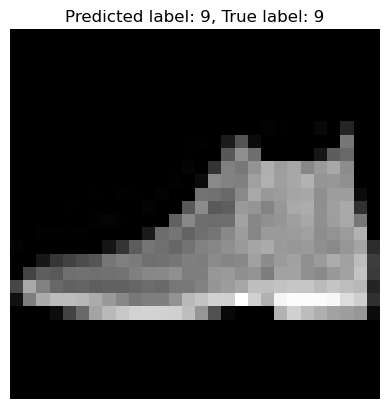

In [59]:
#Predictions for two test images
predictions = model.predict(test_images[:2])


#Display the images and their predicted labels
for i in range(2):
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f'Predicted label: {np.argmax(predictions[i])}, True label: {np.argmax(test_labels[i])}')
    plt.axis('off')
    plt.show()

In [ ]:
#The predicted label is exactly the same as the true label, showing that the model is working properly and accurately. 